In [1]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# reading dataset

df = pd.read_csv('/home/pedro/bkp/code/dataset/INFLUD-21-09-2020.csv',sep=';',encoding = "ISO-8859-1")


# Hospitalized people with age small than 110:
df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
print(df.shape)


# Macro Regions
north  =  set(['RO','AC','AM','RR','PA','AP','TO'])
northeast  =  set(['MA','PI','BA','CE','RN','PB','PE','AL','SE'])
midwest  =  set(['MT','MS','GO','DF'])
southeast  =  set(['SP','RJ','MG','ES'])
south = set(['RS','SC','PR'])

#df = df[df['SG_UF_NOT'].isin(north)]
#df = df[df['SG_UF_NOT'].isin(northeast)]
#df = df[df['SG_UF_NOT'].isin(midwest)]
#df = df[df['SG_UF_NOT'].isin(southeast)]
df = df[df['SG_UF_NOT'].isin(south)]


print('confirmed data:',df.shape[0])

/home/pedro/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,60,62,63,64,92,94,108,117,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-2-2fd7bafc6335>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
<ipython-input-2-2fd7bafc6335>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
<ipython-input-2-2fd7bafc6335>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCA

(242679, 154)
confirmed data: 29040


In [3]:
df = df[['NU_IDADE_N','CS_ESCOL_N','EVOLUCAO']]


In [4]:
# boxing the age feature

bins = [0, 40, 50, 60, 70, 150]
names = ['<40', '40-50', '50-60','60-70','>=70']


df['NU_IDADE_N'] = pd.cut(df['NU_IDADE_N'], bins=bins, labels=names, right= False)
print(df['NU_IDADE_N'].value_counts())


>=70     8854
60-70    6173
50-60    5558
40-50    4266
<40      4189
Name: NU_IDADE_N, dtype: int64


In [5]:
df['NU_IDADE_N'] = df['NU_IDADE_N'].replace({'<40': int(40), '40-50':int(50), '50-60':int(60), '60-70':int(70), '>=70':int(80)})
print(df['NU_IDADE_N'].value_counts())

80    8854
70    6173
60    5558
50    4266
40    4189
Name: NU_IDADE_N, dtype: int64


In [6]:
print(df['NU_IDADE_N'].isna().sum())

0


In [7]:
# Normalization

Illiterate    = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 0)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
fundamentalI  = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 1)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
fundamentalII = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 2)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
medium        = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 3)& ((df['EVOLUCAO']==1)|(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
university    = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 4)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)

print(Illiterate)

40     52
50     30
60     49
70     99
80    338
Name: NU_IDADE_N, dtype: int64


In [8]:
# Death and Cure patients divided by color and age bins

# Death
Illiterate_dea    = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 0)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
fundamentalI_dea  = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 1)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
fundamentalII_dea = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 2)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
medium_dea        = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 3)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
university_dea    = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 4)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)

# Cured
Illiterate_cur    = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 0)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
fundamentalI_cur  = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 1)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
fundamentalII_cur = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 2)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
medium_cur        = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 3)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
university_cur    = df['NU_IDADE_N'][((df['CS_ESCOL_N'] == 4)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)

print(Illiterate_cur)

40     48
50     17
60     39
70     58
80    149
Name: NU_IDADE_N, dtype: int64


In [9]:
print(Illiterate_cur.index)

Int64Index([40, 50, 60, 70, 80], dtype='int64')


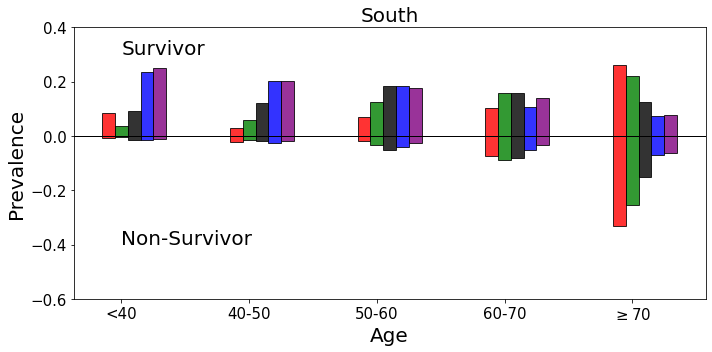

In [10]:
# Plotting graphic

barWidth = 1

plt.figure(figsize=(10,5))

plt.bar(Illiterate_cur.index-1, Illiterate_cur/Illiterate.sum(), color='red', alpha =0.8, width=barWidth, edgecolor='black',linewidth=1)
plt.bar(fundamentalI_cur.index, fundamentalI_cur/fundamentalI.sum(), color='green', alpha =0.8, width=barWidth, edgecolor='black',linewidth=1)
plt.bar(fundamentalII_cur.index+1, fundamentalII_cur/fundamentalII.sum(), color='black', alpha =0.8, width=barWidth, edgecolor='black',linewidth=1)
plt.bar(medium_cur.index+2, medium_cur/medium.sum(), color='blue', alpha =0.8, width=barWidth, edgecolor='black',linewidth=1)
plt.bar(university_cur.index+3, university_cur/university.sum(), color='purple', alpha =0.8, width=barWidth, edgecolor='black',linewidth=1)


plt.bar(Illiterate_dea.index-1, -Illiterate_dea/Illiterate.sum(), color='red',alpha =0.8,width=barWidth, edgecolor='black', label='Illiterate',linewidth=1)
plt.bar(fundamentalI_dea.index, -fundamentalI_dea/fundamentalI.sum(), color='green', alpha =0.8,width=barWidth, edgecolor='black', label='Fundamental I',linewidth=1)
plt.bar(fundamentalII_dea.index+1, -fundamentalII_dea/fundamentalII.sum(), color='black', alpha =0.8, width=barWidth, edgecolor='black', label='Fundamental II',linewidth=1)
plt.bar(medium_dea.index+2, -medium_dea/medium.sum(), color='blue', alpha =0.8, width=barWidth, edgecolor='black', label='Medium',linewidth=1)
plt.bar(university_dea.index+3, -university_dea/university.sum(), color='purple', alpha =0.8, width=barWidth, edgecolor='black', label='University',linewidth=1)


#plt.legend(fontsize=15,loc='lower left')
#plt.title('North', fontsize=20)
#plt.title('Northeast', fontsize=20)
#plt.title('Midwestern', fontsize=20)
#plt.title('Southwest', fontsize=20)
plt.title('South', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Prevalence', fontsize=20)
plt.xlabel('Age', fontsize=20)
x = [40, 50, 60, 70, 80]
plt.xticks(x, ('<40', '40-50', '50-60','60-70','$\geq$70'))
plt.ylim(-0.6,0.4)
plt.text(40, 0.3, 'Survivor', fontsize=20)
plt.text(40, -0.4, 'Non-Survivor', fontsize=20)
#plt.text(55, -0.4, 'Non-Survivor', fontsize=20)
plt.axhline(y=0,linewidth=1,color='k')
plt.tight_layout()
#plt.savefig('north_age.pdf')
#plt.savefig('northeast_age.pdf')
#plt.savefig('midwestern_age.pdf')
#plt.savefig('southeast_age.pdf')
plt.savefig('south_age.pdf')
plt.show()

